<a href="https://colab.research.google.com/github/7nos/7nos/blob/master/DL_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Expt  3 : Construct a regression model for predicting the fuel efficiency of cars using the MPG dataset.**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
columns = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
data = pd.read_csv(url, names=columns, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

print("Demo by G. Solomon Matthews, AIML A and B secs")

print("Dataset preview:")
print(data.head())

Demo by G. Solomon Matthews, AIML A and B secs
Dataset preview:
    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  


In [ ]:
print("\nMissing values in each column:")
print(data.isnull().sum())

data = data.dropna()

data['Origin'] = data['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
data = pd.get_dummies(data, columns=['Origin'], drop_first=True)


Missing values in each column:
MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


<ipython-input-3-8bb6259d4570>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Origin'] = data['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})


In [ ]:
X = data.drop('MPG', axis=1)
y = data['MPG']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nTraining set shape:")
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)

print("\nTest set shape:")
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)


Training set shape:
X_train.shape (313, 8)
y_train.shape (313,)

Test set shape:
X_test.shape (79, 8)
y_test.shape (79,)


In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 593.2786 - mae: 23.0175 - val_loss: 630.8534 - val_mae: 23.9330
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 517.7283 - mae: 21.5120 - val_loss: 599.2714 - val_mae: 23.2585
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 551.3845 - mae: 22.0797 - val_loss: 562.9369 - val_mae: 22.4695
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 462.4792 - mae: 20.1208 - val_loss: 522.0058 - val_mae: 21.5431
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 440.7239 - mae: 19.5355 - val_loss: 473.3633 - val_mae: 20.4113
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 424.4468 - mae: 19.0926 - val_loss: 416.6200 - val_mae: 19.0335
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 344.8254 - mae: 16.9797 - val_loss: 353.4942 - val_mae: 17.3875
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 283.9937 - mae: 15.0254 - val_loss: 285.4042 - val_mae: 15.4555
Epoch 9/100
8/8 ━━━━━━━━━━

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"\nTest Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.9864 - mae: 1.7616

Test Loss (MSE): 6.770112037658691
Test MAE: 1.8199142217636108


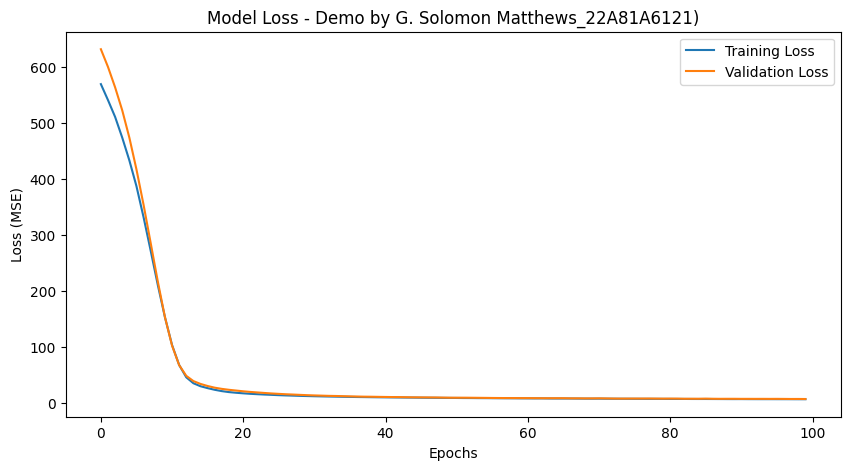

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss - Demo by G. Solomon Matthews_22A81A6121)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

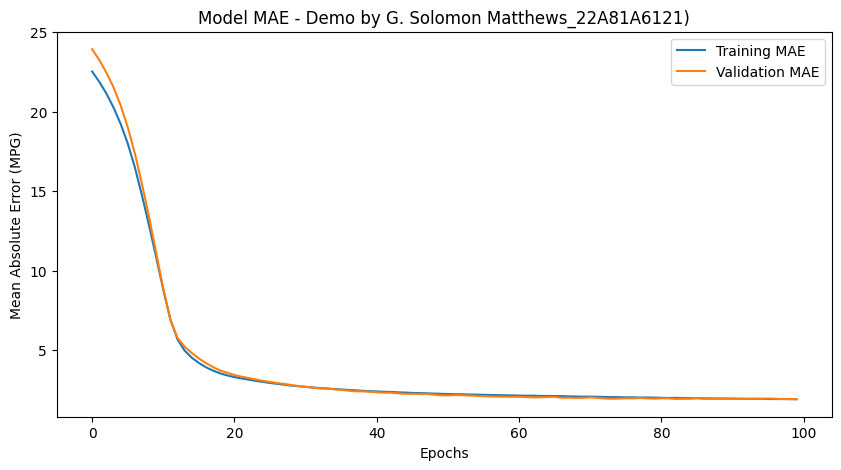

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE - Demo by G. Solomon Matthews_22A81A6121)')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MPG)')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


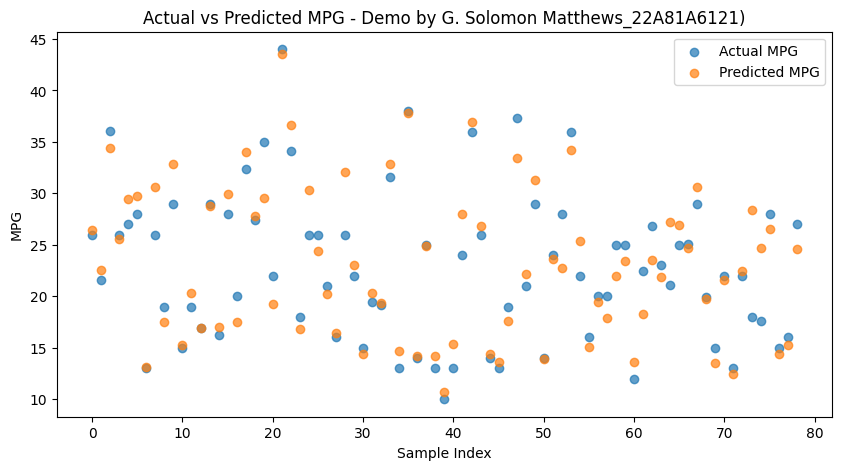

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label='Actual MPG', alpha=0.7)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted MPG', alpha=0.7)
plt.title('Actual vs Predicted MPG - Demo by G. Solomon Matthews_22A81A6121)')
plt.xlabel('Sample Index')
plt.ylabel('MPG')
plt.legend()
plt.show()